In [5]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd

In [3]:
dataset = pd.read_csv('song_lyrics.csv')
dataset.sort_values(by='id')
dataset.head()

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1,en,en,en
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",3,en,en,en
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,4,en,en,en
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,5,en,en,en
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",6,en,en,en


In [ ]:
def filter_songs(df):
    filtered_df = df[(df['tag'] == 'rap') & (df['language'] == 'en') & 
                     (df['lyrics'].notna()) & (df['lyrics'] != '') & 
                     (df['lyrics'] != '[Instrumental]') & (df['views'] != 0)]
    return filtered_df[['id', 'title', 'artist', 'lyrics', 'views']]

In [8]:
dataset = filter_songs(dataset)
dataset.to_csv('filtered_song_lyrics.csv', index=False)
dataset.head()

,id,title,artist,lyrics,views
0,1,Killa Cam,Cam'ron,"[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",173166
1,3,Can I Live,JAY-Z,"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",468624
2,4,Forgive Me Father,Fabolous,Maybe cause I'm eatin\nAnd these bastards fien...,4743
3,5,Down and Out,Cam'ron,[Produced by Kanye West and Brian Miller]\n\n[...,144404
4,6,Fly In,Lil Wayne,"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",78271


In [8]:
dataset = pd.read_csv('filtered_song_lyrics.csv')


In [9]:
dataset['lyrics'][0]

'[Chorus: Opera Steve & Cam\'ron]\nKilla Cam, Killa Cam, Cam\nKilla Cam, Killa Cam\nKilla Cam, Cam\nKilla Cam, Killa Cam, Cam\nKilla Killa Killa Cam\nKilla Cam, Cam, Killa (Killa!)\nKilla Cam, Killa Cam, Cam (Bases loaded)\nKilla Cam, Killa Cam (Uh-huh)\nKilla Cam, Cam (Santana on second, Jim on third)\nKilla Cam, Killa Cam, Cam (I\'m at bat)\nKilla Killa Killa Cam\nKilla Cam, Cam, Killa (I\'m \'bout to hit this shit out the world)\nKilla Cam (Ugh, Heatmakerz), Killa Cam, Cam\nKilla Cam, Killa Cam\nKilla Cam, Cam (Hahahaha)\nKilla Cam, Killa Cam, Cam\nKilla Killa Killa Cam\nKilla Cam, Cam, Killa (We  make this shit clap)\nKilla Cam, Killa Cam, Cam\nKilla Cam, Killa Cam\nKilla Cam, Cam\nKilla Cam, Killa Cam, Cam\nKilla Killa Killa Cam (Killa! Killa!)\nKilla Cam, Cam, Killa\n[Verse 1]\nWith the goons I spar, stay in tune with ma (What up?)\nShe like, "Damn, this the realest since \'Kumbaya\'"\nBomaye, Killa Cam, my Lord (My Lord)\nStill the man with the pan, scrilla, fam, on board\nNow b

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def process_lyrics(lyric):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english')).union({'verse', 'chorus', 'intro', 'outro', 'dat', 'da'})

    lyric = lyric.lower()
    lyric = re.sub(r'[^a-z0-9\s]', '', lyric)
    words = lyric.split()
    return ' '.join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dmachado111/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dmachado111/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
process_lyrics(dataset['lyrics'][0])

'opera steve camron killa cam killa cam cam killa cam killa cam killa cam cam killa cam killa cam cam killa killa killa cam killa cam cam killa killa killa cam killa cam cam base loaded killa cam killa cam uhhuh killa cam cam santana second jim third killa cam killa cam cam im bat killa killa killa cam killa cam cam killa im bout hit shit world killa cam ugh heatmakerz killa cam cam killa cam killa cam killa cam cam hahahaha killa cam killa cam cam killa killa killa cam killa cam cam killa make shit clap killa cam killa cam cam killa cam killa cam killa cam cam killa cam killa cam cam killa killa killa cam killa killa killa cam cam killa 1 goon spar stay tune like damn realest since kumbaya bomaye killa cam lord lord still man pan scrilla fam board bitch want neuter nigga want tutor hooligan houlihans maneuverings nothing new doggy im land grind panpan gram dime toe mc say hammer time beef hammer mine get hand nine bama line corduroy camll shine canary burgundy call lemon red red yello

In [13]:
dataset['processed_lyrics'] = dataset['lyrics'].apply(process_lyrics)
dataset.head()

,id,title,artist,lyrics,views,processed_lyrics
0,1,Killa Cam,Cam'ron,"[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",173166,opera steve camron killa cam killa cam cam kil...
1,3,Can I Live,JAY-Z,"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",468624,produced irv gotti yeah hah yeah rocafella inv...
2,4,Forgive Me Father,Fabolous,Maybe cause I'm eatin\nAnd these bastards fien...,4743,maybe cause im eatin bastard fiend grub carry ...
3,5,Down and Out,Cam'ron,[Produced by Kanye West and Brian Miller]\n\n[...,144404,produced kanye west brian miller camron kanye ...
4,6,Fly In,Lil Wayne,"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",78271,ask young boy gon second time around gon come ...


In [12]:
import matplotlib.pyplot as plt

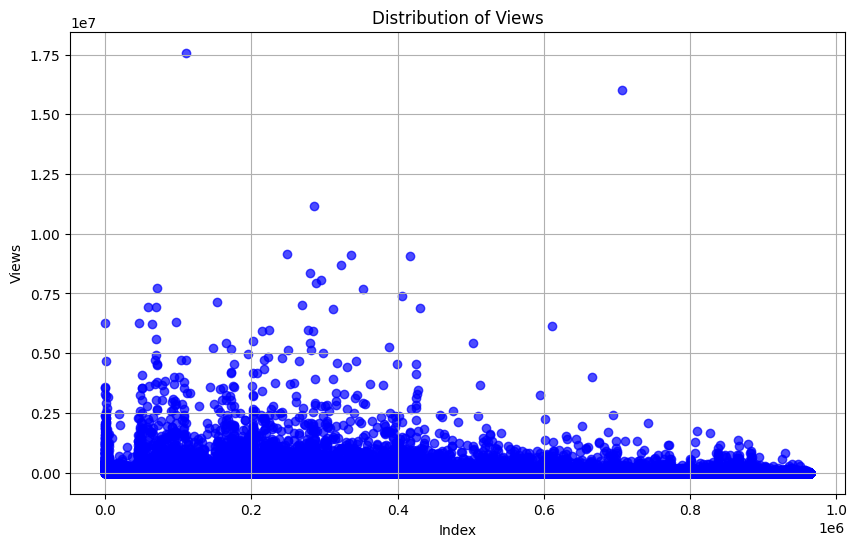

In [19]:
sorted_dataset = dataset

plt.figure(figsize=(10, 6))
plt.scatter(dataset.index, dataset['views'], alpha=0.7, color='blue')
plt.title('Distribution of Views')
plt.xlabel('Index')
plt.ylabel('Views')
plt.grid(True)
plt.show()

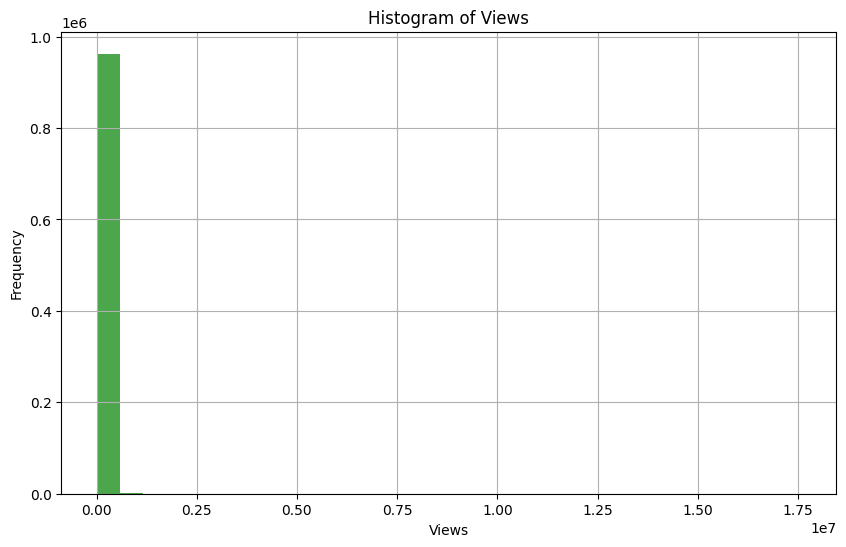

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(dataset['views'], bins=30, color='green', alpha=0.7)
plt.title('Histogram of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [73]:
dataset['popularity'] = pd.qcut(dataset['views'], q=2)
dataset.head()

,id,title,artist,lyrics,views,processed_lyrics,popularity
0,1,Killa Cam,Cam'ron,"[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",173166,opera steve camron killa cam killa cam cam kil...,"(70.0, 17575634.0]"
1,3,Can I Live,JAY-Z,"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",468624,produced irv gotti yeah hah yeah rocafella inv...,"(70.0, 17575634.0]"
2,4,Forgive Me Father,Fabolous,Maybe cause I'm eatin\nAnd these bastards fien...,4743,maybe cause im eatin bastard fiend grub carry ...,"(70.0, 17575634.0]"
3,5,Down and Out,Cam'ron,[Produced by Kanye West and Brian Miller]\n\n[...,144404,produced kanye west brian miller camron kanye ...,"(70.0, 17575634.0]"
4,6,Fly In,Lil Wayne,"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",78271,ask young boy gon second time around gon come ...,"(70.0, 17575634.0]"


In [15]:
songs = dataset[['id', 'title', 'artist', 'processed_lyrics', 'popularity']]
songs.to_csv('processed_song_lyrics.csv', index=False)
print(songs.size)
print(songs.shape)
songs.head()

4820080
(964016, 5)


,id,title,artist,processed_lyrics,popularity
0,1,Killa Cam,Cam'ron,opera steve camron killa cam killa cam cam kil...,High
1,3,Can I Live,JAY-Z,produced irv gotti yeah hah yeah rocafella inv...,High
2,4,Forgive Me Father,Fabolous,maybe cause im eatin bastard fiend grub carry ...,High
3,5,Down and Out,Cam'ron,produced kanye west brian miller camron kanye ...,High
4,6,Fly In,Lil Wayne,ask young boy gon second time around gon come ...,High


In [16]:
songs = pd.read_csv('processed_song_lyrics.csv')

In [17]:
from features import *
features = pd.DataFrame()

In [18]:
features['word_count'] = songs['processed_lyrics'].apply(word_count)

In [19]:
features['unique_word_count'] = songs['processed_lyrics'].apply(unique_word_count)

In [20]:
features['sentiment_polarity'], features['sentiment_subjectivity'] = zip(*songs['processed_lyrics'].apply(sentiment_analysis))

In [21]:
features['profanity_count'] = songs['processed_lyrics'].apply(profanity_count)

In [22]:
features['readability_score'] = songs['processed_lyrics'].apply(readability_scores)

In [24]:
features.to_csv('features.csv', index=False)
features.head()


,word_count,unique_word_count,sentiment_polarity,sentiment_subjectivity,profanity_count,readability_score
0,571,233,-0.025524,0.545047,14,-493.925797
1,305,254,-0.000433,0.532964,3,-245.589180
2,303,235,-0.015404,0.378497,9,-221.886238
3,447,272,-0.014984,0.444097,12,-372.350537
4,241,177,-0.033667,0.320000,10,-158.887884


In [25]:
from sklearn.model_selection import train_test_split

In [49]:
X = features[['word_count', 'unique_word_count', 'sentiment_polarity', 'sentiment_subjectivity', 'profanity_count', 'readability_score']]
y = songs['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from models.multinomial_logistic_regression import *
from evaluate import *

In [56]:
mlr = MLR()

In [58]:
mlr_hyperparameters = mlr.cross_validation(X_train, y_train)
print(mlr_hyperparameters)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Python(95689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(95690) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(95692) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(95693) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(95694) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(95696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(95697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(95698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/usr/local/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/loc

{'logisticregression__C': 0.1, 'logisticregression__max_iter': 10000, 'logisticregression__solver': 'sag', 'logisticregression__tol': 0.001}


In [59]:
mlr.fit(X_train,y_train, mlr_hyperparameters)
mlr.mlr

LogisticRegression(C=0.1, max_iter=10000, multi_class='multinomial',
                   solver='sag', tol=0.001)

In [60]:
mlr_prediction = mlr.predict(X_test)
print(mlr_prediction)

['Medium' 'High' 'High' ... 'High' 'High' 'Low']


In [61]:
accuracy, mac_f1, mic_f1 = evaluate(mlr_prediction, y_test)
print(f"Accuracy: {accuracy}")
print(f"Macro f1: {mac_f1}")
print(f"Micro f1: {mic_f1}")

Accuracy: 0.43679591709715565
Macro f1: 0.42312718592262294
Micro f1: 0.4367959170971556


In [46]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [69]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)

In [70]:
from models.neural_network import *

In [64]:
model = SongPopularityClassifier()
model.train_model(train_loader, number_of_epochs=50, learning_rate=0.001)

Epoch [1/50], Loss: 1.0226
Epoch [2/50], Loss: 1.1923
Epoch [3/50], Loss: 0.9744
Epoch [4/50], Loss: 1.0766
Epoch [5/50], Loss: 1.0681
Epoch [6/50], Loss: 0.9811
Epoch [7/50], Loss: 1.1881
Epoch [8/50], Loss: 1.0913
Epoch [9/50], Loss: 1.1365
Epoch [10/50], Loss: 1.0602
Epoch [11/50], Loss: 1.0883
Epoch [12/50], Loss: 1.0877
Epoch [13/50], Loss: 0.9885
Epoch [14/50], Loss: 1.1390
Epoch [15/50], Loss: 1.0650
Epoch [16/50], Loss: 1.0987
Epoch [17/50], Loss: 0.8997
Epoch [18/50], Loss: 1.1625
Epoch [19/50], Loss: 1.0235
Epoch [20/50], Loss: 1.0537
Epoch [21/50], Loss: 1.1300
Epoch [22/50], Loss: 0.9939
Epoch [23/50], Loss: 1.1894
Epoch [24/50], Loss: 1.0750
Epoch [25/50], Loss: 0.9065
Epoch [26/50], Loss: 1.0067
Epoch [27/50], Loss: 0.8882
Epoch [28/50], Loss: 1.0699
Epoch [29/50], Loss: 0.9410
Epoch [30/50], Loss: 0.9538
Epoch [31/50], Loss: 0.9689
Epoch [32/50], Loss: 1.0022
Epoch [33/50], Loss: 1.0457
Epoch [34/50], Loss: 1.0435
Epoch [35/50], Loss: 1.0201
Epoch [36/50], Loss: 1.1491
E

In [67]:
probabilities, predicted_classes = model.get_predictions(X_test_tensor)

In [68]:
nn_accuracy, nn_mac_f1, nn_mic_f1 = evaluate(predicted_classes, y_test)
print(f"Accuracy: {nn_accuracy}")
print(f"Macro f1: {nn_mac_f1}")
print(f"Micro f1: {nn_mic_f1}")

Accuracy: 0.441552042488745
Macro f1: 0.42042380596315776
Micro f1: 0.441552042488745
